### 상수 텐서와 변수

In [ ]:
# 코드 3-1 모두 1 또는 0 인 텐서
import tensorflow as tf

x = tf.ones(shape = (2, 1))
print(x)

y = tf.zeros(shape = (2, 1))
print(y)

In [ ]:
# 코드 3-2 랜덤 텐서

x = tf.random.normal(shape = (3, 1), mean = 0. , stddev = 1.)
# 평균이 0 이고 표전편차가 1인 정규 분포에서 뽑은 랜덤한 값으로 만든 텐서
print(x)

In [ ]:
x = tf.random.uniform(shape = (3, 1), minval = 0, maxval = 1.)
# 0과 1사이의 균등분포에서 뽑은 랜덤한 값으로 만든 텐서
print(x)

In [ ]:
# 3-3 넘파이 배열에 값 할다하기

import numpy as np

x = np.ones(shape = (2, 2))
x[0, 0] = 0


In [18]:
# 3-4 텐서플로 텐서에 값을 할당하지 못함.
x = tf.ones(shape(2, 2))
x[0, 0] = 0

NameError: name 'shape' is not defined

In [19]:
# 3-5 텐서플로 변수 만들기
v = tf.Variable(initial_value = tf.random.normal(shape = (3, 1)))
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[-0.23253198],
       [ 1.3613092 ],
       [ 0.84806186]], dtype=float32)>


In [25]:
# 코드 3-6 텐서플로 변수에 값 할당하기.
v.assign(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>

In [26]:
# 코드 3-7 변수 일부 값 할당하기.
v[0, 0].assign(7.)
# [0, 0]의 값을 7.으로 교체

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[7.],
       [1.],
       [1.]], dtype=float32)>

In [27]:
# 코드 3-8 assing_add() 사용하기
v.assign_add(tf.ones((3, 1)))
# 기존의 값에 1씩 더함.

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[8.],
       [2.],
       [2.]], dtype=float32)>

### 텐서 연산 : 텐서플로에서 수학 계산하기.

In [6]:
# 코드 3-9 기본적인 연산
import tensorflow as tf

a = tf.ones((2, 2))
b = tf.square(a)  # 제곱
c = tf.sqrt(a)    # 제곱근
d = b + c         #  두 텐서의 합
e = tf.matmul(a, b)  # 두 텐서의 점곱을 계산
e *= d               # 두 텐서를 곱함

print(a)
print(b)
print(c)
print(d)
print(e)

tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[2. 2.]
 [2. 2.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[4. 4.]
 [4. 4.]], shape=(2, 2), dtype=float32)


### GradientTape API 다시 살펴보기

- 넘파이와 비슷해 보이지만, 넘파이가 할 수 없는 것이 있음.
- 미분 가능한 표현이라면 어떤 입력이라도 계산가능.
- GradientTape블록을 시작하고 하나 혹은 여러 입력 텐서에 대해 계산을 수행한 후 입력에 대해 결과의 그레디언트를 구하면됨.

In [1]:
# 코드 3-10 GradientTape 사용하기
import tensorflow as tf

input_var = tf.Variable(initial_value = 3.)

with tf.GradientTape() as tape:
    result = tf.square(input_var)
gradient = tape.gradient(result, input_var)

- gradient = tape.gradient(loss, weights)와 같이 가중치에 대한 모델 손실의 그레디언트를 계산하는데 가장 널리 사용되는 방법.
- 실제로 입력은 어떤 텐서라도 가능하지만 텐서플로는 기본적으로 훈련 가능한 변수만 추적함.
- 상수 텐서의 경우 tape.watch()를 호출하여 추적한다는 것을 수동으로 알려 주어야함.

In [4]:
# 코드 3-11 상수 텐서 입력과 함께 GradientTape 사용하기.
input_const = tf.constant(3.)
with tf.GradientTape() as tape :
    tape.watch(input_const)  # 위 코드에서 하나 추가된 부분
    result = tf.square(input_const)
gradient = tape.gradient(result, input_const)

#### 왜 tape.watch()가 필요할까?
- 모든 텐서에 대해 그레디언트를 계한하기 위해 필요한 정보를 미리 앞서서 저장하는 것은 비용이 많이 들기 때문.
- 자원 낭비를 막기 위해 테이브는 감시할 대상을 알아야함.
- 훈련 가능한 변수는 기본적으로 감시 대상임.
- 그레이언트 테이프는 강력한 유틸리티이다.

#### 그레디언트의 그레이턴트도 계산이 가능.
- 예시로 시간에 대한 물체 위치의 그레디언트는 물체의 속도고, 이계도 그레이디언터는 가속이다.
- 수직 방향으로 낙하하는 사과의 위치를 시간에 따라 측정하고 position(time) = 4.9 * time ** 2임을 안다면 가속도는 얼마일까?
- 2개의 그레이디언트 테이프를 중첩하여 구해보자.

In [6]:
# 코드 3-12 그레이디언터 테이프를 중첩하여 이계도 그레이티언트 계산하기

time = tf.Variable(0.)

with tf.GradientTape() as outer_tape :
    with tf.GradientTape() as inner_tape :
        position = 4.9 * time ** 2
    speed = inner_tape.gradient(position, time)
acceleration = outer_tape.gradient(speed, time)

### 엔드-투-엔드 예제 : 텐서플로 선형 분류기

- 선형적으로 잘 구분되는 합성 데이터를 만들어보자.
- 2D평면의 포인트로 2개의 클래스를 가진다.
- 특정한 평균과 공분산 행렬(Covariance Matrix)을 가진 랜덤한 분포에서 좌표 값을 뽑아 각 클래스의 포인트를 생성.

In [2]:
# 코드 3-13 2D 평명에 두 클래스의 랜덤한 포인트 생성하기.
import numpy as np

num_samples_per_class = 1000

negative_samples = np.random.multivariate_normal(
mean = [0, 3],                       # 좌표 0, 3을 중심을 두고 분포
    cov = [[1, 0.5], [0.5, 1]],
    size = num_samples_per_class
)

positive_samples = np.random.multivariate_normal(
    mean = [3, 0],                   # 좌표 3, 0을 중심을 두고 분포
    cov = [[1, 0.5], [0.5, 1]],
    size = num_samples_per_class
)
# https://chatgpt.com/share/6798182e-90d0-8007-b7f7-e7c5d7ce8c45  코드설명.

- 앞의 코드에서 negative_samples와 positive_samples는 모두 (1000, 2)크기의 배열.
- 이를 수직으로 연결하여 (2000, 2) 크기의 다일 배열을 만들어 보자

In [4]:
# 코드 3-14 두 클래서를 (2000, 2) 크기의 한 배열로 쌓기
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

- (2000, 2) 크기의 0 배열과 1배열을 합쳐 타깃 레이블을 생성.
- input[i]가 클래스 0에 속하면 targets[i, 0]은 0이다.

In [7]:
# 코드 3-15 (0과 1로 구성된) 타기 생성하기.

targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype = 'float32'),
                     np.ones((num_samples_per_class, 1), dtype = 'float32')))

- 맷플롯립(Matplotlib)을 이용해서 그래프로 나타내 보기.

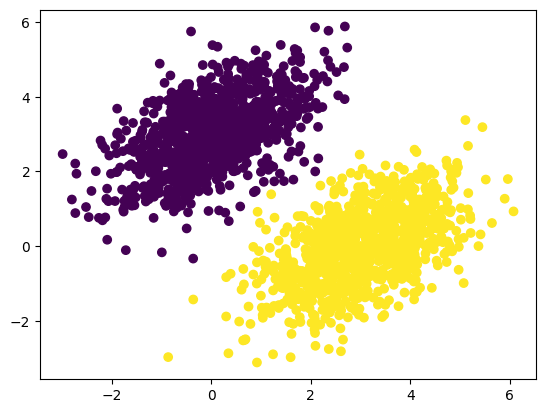

In [12]:
# 코드 3-16 두 클래스의 포인트를 그래프로 그리기
import matplotlib.pyplot as plt

plt.scatter(inputs[:, 0], inputs[:,1], c = targets[:, 0])
plt.show()

- 여기서 두 포인트 클라우드를 구분할 수 있는 선형 분류기 만들기.
- 이는 하나의 아핀 변환(prediction = W * input + b)이며, 예측과 타깃 사이의 차이를 제곱한 값을 최소화하도록 훈련
- 각각 랜덤한 값과 0으로 초기화한 변수 W와 b를 만들어 보자.

In [14]:
# 코드 3-17 선형 분류기의 변수 만들기.
import tensorflow as tf

input_dim = 2
output_dim = 1
W = tf.Variable(initial_value = tf.random.uniform(shape = (input_dim, output_dim)))
b = tf.Variable(initial_value = tf.zeros(shape = (output_dim,)))

In [16]:
# 코드 3-18 정방향 패스 함수

def model(input) :
    return tf.matmul(inputs, W) + b

tf.Variable() [링크 텍스트](https://chatgpt.com/share/67980fc2-ee84-8007-97d4-aa6fbbf61a93) 설명.

In [17]:
# 코드 3-19 평균 제곱 오차 손실 함수
def square_loss(targets, predictions) :
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)

In [19]:
# 코드 3-20 훈련 스텝 함수
learning_rate = 0.1

def training_step(inputs, targets) :
    with tf.GradientTape() as tape :
        predictions = model(inputs)
        loss = square_loss(targets, predictions)
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss

In [20]:
# 코드 3-21 배치 훈련 루프
for step in range(40) :
    loss = training_step(inputs, targets)
    print(f'{step}번째 스텝의 손실 : {loss : 4f}')

0번째 스텝의 손실 :  5.172817
1번째 스텝의 손실 :  0.835919
2번째 스텝의 손실 :  0.245241
3번째 스텝의 손실 :  0.155629
4번째 스텝의 손실 :  0.134586
5번째 스텝의 손실 :  0.123588
6번째 스텝의 손실 :  0.114659
7번째 스텝의 손실 :  0.106659
8번째 스텝의 손실 :  0.099377
9번째 스텝의 손실 :  0.092732
10번째 스텝의 손실 :  0.086667
11번째 스텝의 손실 :  0.081131
12번째 스텝의 손실 :  0.076078
13번째 스텝의 손실 :  0.071465
14번째 스텝의 손실 :  0.067255
15번째 스텝의 손실 :  0.063411
16번째 스텝의 손실 :  0.059903
17번째 스텝의 손실 :  0.056701
18번째 스텝의 손실 :  0.053778
19번째 스텝의 손실 :  0.051109
20번째 스텝의 손실 :  0.048674
21번째 스텝의 손실 :  0.046451
22번째 스텝의 손실 :  0.044421
23번째 스텝의 손실 :  0.042569
24번째 스텝의 손실 :  0.040878
25번째 스텝의 손실 :  0.039335
26번째 스텝의 손실 :  0.037926
27번째 스텝의 손실 :  0.036640
28번째 스텝의 손실 :  0.035466
29번째 스텝의 손실 :  0.034394
30번째 스텝의 손실 :  0.033416
31번째 스텝의 손실 :  0.032523
32번째 스텝의 손실 :  0.031708
33번째 스텝의 손실 :  0.030965
34번째 스텝의 손실 :  0.030285
35번째 스텝의 손실 :  0.029666
36번째 스텝의 손실 :  0.029100
37번째 스텝의 손실 :  0.028583
38번째 스텝의 손실 :  0.028112
39번째 스텝의 손실 :  0.027682


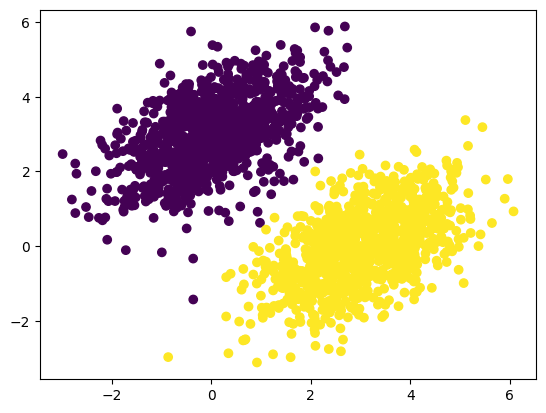

In [22]:
# 이 선형 모델이 훈련 데이터 포인트를 어떻게 분류 하는지 보기.

predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c = predictions[:, 0] > 0.5)
plt.show()

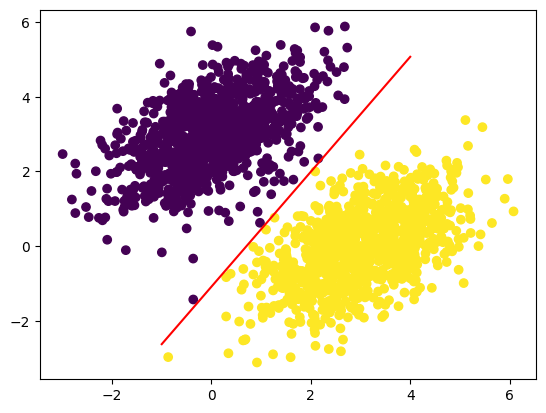

In [23]:
x = np.linspace(-1, 4, 100)  # 직선을 그리기 위해 -1 ~ 4 사이에 일정한 간격을 가진 100개의 숫자를 생성
y = -W[0] / W[1] * x + (0.5 - b) / W[1]  # 사용할 직선의 방정식
plt.plot(x, y, '-r')                     # 직선을 그림 ('-r'은 빨간색을 의미)
plt.scatter(inputs[:, 0], inputs[:, 1], c = predictions[:, 0] > 0.5)  # 동일한 그래프에 모델의 예측을 나타냄
plt.show()